In [4]:
#Full experiment
import Voting_rules
import fairness_metric
import os
import pandas as pd
import numpy as np
from votekit import pref_profile
import matplotlib.pyplot as plt
from votekit.cvr_loaders import load_scottish
from fairness_metric import sigma_IIA, sigma_UF, sigma_IIA_STV, sigma_UF_STV
from Voting_rules import Ranked_Borda, Ranked_Plurality, Ranked_2_Approval,Ranked_3_Approval
from votekit.cvr_loaders import load_scottish  # your load function for Scottish profiles
import matplotlib.patches as mpatches

In [5]:
import os
import re
import pandas as pd
from tqdm import tqdm
import numpy as np
import random

os.environ["PYTHONHASHSEED"] = "2025"
np.random.seed(2025)
random.seed(2025)


# === Import your custom functions ===
# Assume these are implemented elsewhere in your codebase
# from your_module import load_scottish, sigma_IIA, sigma_UF, Ranked_Plurality, Ranked_Borda, Ranked_2_Approval, Ranked_3_Approval

# === Define base path ===
base_path = '/Users/ss2776/Downloads/scot-elex-main'

# === Define all voting rules and labels ===
voting_rules = {
    "Plurality": Ranked_Plurality,
    "Borda": Ranked_Borda,
    "2-Approval": Ranked_2_Approval,
    "3-Approval": Ranked_3_Approval
}

# === Helper: parse council, year, ward from filename ===
def split_file_name(file_name):
    parts = file_name.replace(".csv", "").split("_")
    council_words = []

    for i, part in enumerate(parts):
        if re.match(r"\d{4}", part):  # year pattern
            year = part
            council = "_".join(council_words)
            ward = "_".join(parts[i+1:])
            return council, int(year), ward
        else:
            council_words.append(part)

    # fallback
    return "_".join(parts[:-2]), int(parts[-2]), parts[-1]

# === Main processing ===
records = []

for num_cands in range(3, 15):
    folder_path = os.path.join(base_path, f"{num_cands}_cands")
    if not os.path.exists(folder_path):
        print(f"Skipping missing folder: {folder_path}")
        continue

    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    for file in tqdm(files, desc=f"{num_cands} candidates", leave=False):
        try:
            full_path = os.path.join(folder_path, file)
            profile, seats, cand_list, cand_to_party, _ = load_scottish(full_path)
            council, year, ward = split_file_name(file)

            result = {
                "Council": council,
                "Year": year,
                "Ward": ward,
                "Num_Candidates": num_cands,
                "Num_seats": seats,
            }

            # Compute and store metrics for each rule
            for rule_name, rule_func in voting_rules.items():
                try:
                    result[f"Sigma_IIA_{rule_name}"] = round(float(sigma_IIA(profile, rule_func)),4)
                except Exception as e:
                    print(f"IIA error in {file} ({rule_name}): {e}")
                    result[f"Sigma_IIA_{rule_name}"] = None

                try:
                    result[f"Sigma_UF_{rule_name}"] = round(float(sigma_UF(profile, rule_func)),4)
                except Exception as e:
                    print(f"UF error in {file} ({rule_name}): {e}")
                    result[f"Sigma_UF_{rule_name}"] = None

            result["File"] = file.replace(".csv", "")
            records.append(result)

        except Exception as e:
            print(f"Error processing file {file}: {e}")

# === Create and save final DataFrame ===
df = pd.DataFrame(records)

# Optional: reorder columns for readability
ordered_cols = [
    "Council", "Year", "Ward", "Num_Candidates", "Num_seats",
    "Sigma_IIA_Plurality", "Sigma_IIA_Borda", "Sigma_IIA_2-Approval", "Sigma_IIA_3-Approval",
    "Sigma_UF_Plurality", "Sigma_UF_Borda", "Sigma_UF_2-Approval", "Sigma_UF_3-Approval",
    "File"
]
df = df[ordered_cols]

# === Save output ===
output_path = "/Users/ss2776/Downloads/data_neurips_2025_fout_voting.csv"
df.to_csv(output_path, index=False)
print(f"\n Results saved to: {output_path}")



 Results saved to: /Users/ss2776/Downloads/data_neurips_2025_fout_voting.csv


In [29]:
df["Council"].unique()

array(['eilean_siar', 'stirling', 'sc_borders', 'east_dunbartonshire',
       'moray', 'north_lanarkshire', 'shetland', 'argyll_bute',
       'south_ayrshire', 'south_lanarkshire', 'aberdeenshire', 'highland',
       'midlothian', 'angus', 'orkney', 'aberdeen', 'clackmannanshire',
       'dumgal', 'east_ayrshire', 'falkirk', 'inverclyde', 'edinburgh',
       'fife', 'perth_kinross', 'east_renfrewshire', 'renfrewshire',
       'west_dunbartonshire', 'east_lothian', 'west_lothian',
       'north_ayrshire', 'dundee', 'glasgow'], dtype=object)

In [33]:

council_name_map = {
    'eilean_siar': "Na h-Eileanan Siar",
    'stirling': "Stirling",
    'sc_borders': "Scottish Borders",
    'east_dunbartonshire': "East Dunbartonshire",
    'moray': "Moray",
    'north_lanarkshire': "North Lanarkshire",
    'shetland': "Shetland Islands",
    'argyll_bute': "Argyll and Bute",
    'south_ayrshire': "South Ayrshire",
    'south_lanarkshire': "South Lanarkshire",
    'aberdeenshire': "Aberdeenshire",
    'highland': "Highland",
    'midlothian': "Midlothian",
    'angus': "Angus",
    'orkney': "Orkney Islands",
    'aberdeen': "Aberdeen City",
    'clackmannanshire': "Clackmannanshire",
    'dumgal': "Dumfries and Galloway",
    'east_ayrshire': "East Ayrshire",
    'falkirk': "Falkirk",
    'inverclyde': "Inverclyde",
    'edinburgh': "City of Edinburgh",
    'fife': "Fife",
    'perth_kinross': "Perth and Kinross",
    'east_renfrewshire': "East Renfrewshire",
    'renfrewshire': "Renfrewshire",
    'west_dunbartonshire': "West Dunbartonshire",
    'east_lothian': "East Lothian",
    'west_lothian': "West Lothian",
    'north_ayrshire': "North Ayrshire",
    'dundee': "Dundee City",
    'glasgow': "Glasgow City"
}

# Filter to keep only valid councils
filtered_df = df[df["Council"].isin(council_name_map.keys())].copy()

# Replace council codes with proper names
filtered_df["Council"] = filtered_df["Council"].map(council_name_map)

# Drop the display and file name if they exist
cols_to_drop = [col for col in ["Council_Display", "File"] if col in filtered_df.columns]
filtered_df.drop(columns=cols_to_drop, inplace=True)

# Final output
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()



,Council,Year,Ward,Num_Candidates,Num_seats,Sigma_IIA_Plurality,Sigma_IIA_Borda,Sigma_IIA_2-Approval,Sigma_IIA_3-Approval,Sigma_UF_Plurality,Sigma_UF_Borda,Sigma_UF_2-Approval,Sigma_UF_3-Approval
0,Na h-Eileanan Siar,2022,ward3,3,2,1.0,1.0,1.0000,1.0000,1.0,1.0,1.0,1.0000
1,Na h-Eileanan Siar,2022,ward4,3,2,1.0,1.0,1.0000,1.0000,1.0,1.0,1.0,1.0000
2,Stirling,2012,ward5,4,3,1.0,1.0,0.8333,0.8333,1.0,1.0,1.0,0.9231
3,Scottish Borders,2017,ward11,4,3,1.0,1.0,1.0000,1.0000,1.0,1.0,1.0,1.0000
4,East Dunbartonshire,2012,ward1,4,3,1.0,1.0,1.0000,1.0000,1.0,1.0,1.0,1.0000


In [9]:
#Code for STV
from votekit.elections import STV
from votekit.cleaning import remove_noncands

def Ranked_STV(profile, seats):
    """
    Given a PreferenceProfile, and seats returns the complete STV ranking as a list.
    
    Args:
        profile (PreferenceProfile): The preference profile with ballots and candidates.
    
    Returns:
        list: Candidates ranked from winner to last place according to Borda scores.
    """

    election = STV (profile, m= seats)
    
    # Get the full ranking (tuple of frozensets)
    borda_ranking = election.get_ranking(-1)
    
    # Flatten the frozensets into a list
    ranking_list = []
    for group in borda_ranking:
        ranking_list.extend(list(group))  # groups can have ties (more than one candidate)
    
    return ranking_list


def sigma_IIA_STV(profile, seats, voting_rule):
    """
    Compute σIIA fairness score for a given a STV, profile and seats.

    Args:
        profile (PreferenceProfile): The input profile with ballots and candidates.
        voting_rule (function): A STV voting rule function that takes a profile,seats and returns a ranking.
    Returns:
        float: σIIA score between 0 and 1.
    """
    original_ranking = voting_rule(profile,seats)
    M = len(profile.candidates)
    total_distance = 0

    for candidate in profile.candidates:
        # compute profile without the candidate
        profile_without_candidate = remove_noncands(profile, [candidate])
        
        # Get rankings
        ranking_without_candidate = voting_rule(profile_without_candidate,seats)
        original_ranking_without_candidate = [cand for cand in original_ranking if cand != candidate]
        
        # Compute Kendall Tau distance
        distance = kendall_tau_distance(ranking_without_candidate, original_ranking_without_candidate)
        
        total_distance += distance

    # Normalize and invert
    sigma_iia = 1 - total_distance / ((M * (M-1)* (M-2)) / 2)

    return sigma_iia


def sigma_UF_STV(profile,seats, voting_rule):
    """
    Compute Unanimity Fairness (σUF) for a given voting rule and profile.

    Args:
        profile (PreferenceProfile): The input profile with ballots and candidates.
        voting_rule (function): A function like Ranked_Borda(profile) or Ranked_Plurality(profile).
    
    Returns:
        float: σUF score between 0 and 1.
    """
    candidates = profile.candidates
    N = sum(ballot.weight for ballot in profile.ballots)  # Total voter weight

    # Get the full ranking from the voting rule
    ranking = voting_rule(profile, seats)

    # Map candidates to positions
    rank_position = {cand: idx for idx, cand in enumerate(ranking)}

    min_ratio = 1.0  # Initialize

    # For every unordered candidate pair (A, B)
    for i in range(len(candidates)):
        for j in range(i+1, len(candidates)):
            A = candidates[i]
            B = candidates[j]

            A_over_B = 0
            B_over_A = 0

            # Count support for A over B and B over A
            for ballot in profile.ballots:
                weight = ballot.weight
                if not ballot.ranking:
                    continue
                ranks = {cand: idx for idx, group in enumerate(ballot.ranking) for cand in group}

                A_in = A in ranks
                B_in = B in ranks

                if A_in and B_in:
                    if ranks[A] < ranks[B]:
                        A_over_B += weight
                    elif ranks[B] < ranks[A]:
                        B_over_A += weight
                elif A_in and not B_in:
                    A_over_B += weight
                elif B_in and not A_in:
                    B_over_A += weight
                else:  # neither A nor B ranked
                    A_over_B += 0.5 * weight
                    B_over_A += 0.5 * weight

            # Now normalize
            SA = A_over_B / N
            SB = B_over_A / N
            max_support = max(SA, SB)

            if max_support == 0:
                continue  # No information about A vs B

            # Depending on outcome ranking
            if rank_position[A] < rank_position[B]:  # A ranked above B
                ratio = SA / max_support
            else:  # B ranked above A
                ratio = SB / max_support

            # Update minimum ratio
            min_ratio = min(min_ratio, ratio)

    return min_ratio

def kendall_tau_distance(list1, list2):
    """
    Compute Kendall Tau distance between two rankings (lists).
    
    Args:
        list1 (list): First ranking (ordered list of candidates).
        list2 (list): Second ranking (ordered list of candidates).
    
    Returns:
        int: Kendall Tau distance (number of pairwise disagreements).
    """
    assert len(list1) == len(list2), "Lists must have the same size"
    
    distance = 0
    n = len(list1)
    
    # Build position maps for fast lookup
    pos1 = {candidate: idx for idx, candidate in enumerate(list1)}
    pos2 = {candidate: idx for idx, candidate in enumerate(list2)}
    
    # Check all pairs
    for i in range(n):
        for j in range(i+1, n):
            cand_i = list1[i]
            cand_j = list1[j]
            
            # Compare relative order
            if (pos1[cand_i] - pos1[cand_j]) * (pos2[cand_i] - pos2[cand_j]) < 0:
                # They disagree
                distance += 1
    
    return distance


In [11]:
#STV code

from tqdm import tqdm
import os
import re

import numpy as np

np.random.seed(2025)



# 1. Base path and helper functions

base_path = '/Users/ss2776/Downloads/scot-elex-main'

# === Helper: parse council, year, ward from filename ===
def split_file_name(file_name):
    parts = file_name.replace(".csv", "").split("_")
    council_words = []

    for i, part in enumerate(parts):
        if re.match(r"\d{4}", part):  # year pattern
            year = part
            council = "_".join(council_words)
            ward = "_".join(parts[i+1:])
            return council, int(year), ward
        else:
            council_words.append(part)

    # fallback
    return "_".join(parts[:-2]), int(parts[-2]), parts[-1]


# 2. Storage for results
records = []

# 3. Loop over folders 3_cands to 14_cands
for num_cands in range(3, 15):
    folder_path = os.path.join(base_path, f"{num_cands}_cands")
    
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist, skipping.")
        continue

    files = os.listdir(folder_path)

    
    
    for file in tqdm(files, desc=f"{num_cands} candidates", leave=False):
        if file.endswith('.csv'):
            try:
                full_path = os.path.join(folder_path, file)
                
                # Load election profile
                scottish_profile, seats, cand_list, cand_to_party, ward = load_scottish(full_path)
                council, year, ward = split_file_name(file)
                
                # Compute σIIA metrics
                sigma_iia_stv = sigma_IIA_STV(scottish_profile, seats, Ranked_STV)
                # Compute σUF metrics
                sigma_uf_stv = sigma_UF_STV(scottish_profile, seats, Ranked_STV)
                
                # Record the results
                records.append({
                    "Council": council,
                    "Year": year,
                    "Ward": ward,
                    "Num_Candidates": num_cands,
                    "Num_seats": seats,
                    "Sigma_IIA_STV": sigma_iia_stv,
                    "Sigma_UF_STV": sigma_uf_stv,
                    
                })
                
               
            
            except Exception as e:
                print(f"Error processing {file}: {e}")

# 4. Create results DataFrame
results_df = pd.DataFrame(records)

# 5. Save results to Downloads
results_csv_path = "/Users/ss2776/Downloads/full_scottish_stv_experiment_results.csv"
results_df.to_csv(results_csv_path, index=False)
print(f"Results saved to: {results_csv_path}")

Results saved to: /Users/ss2776/Downloads/full_scottish_stv_experiment_results.csv


In [22]:
df2.columns

Index(['Council', 'Year', 'Ward', 'Num_Candidates', 'Num_seats',
       'Sigma_IIA_STV', 'Sigma_UF_STV'],
      dtype='object')

In [18]:
df1

,Council,Year,Ward,Num_Candidates,Num_seats,Sigma_IIA_Plurality,Sigma_IIA_Borda,Sigma_IIA_2-Approval,Sigma_IIA_3-Approval,Sigma_UF_Plurality,Sigma_UF_Borda,Sigma_UF_2-Approval,Sigma_UF_3-Approval
0,Na h-Eileanan Siar,2022,ward3,3,2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,Na h-Eileanan Siar,2022,ward4,3,2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,Stirling,2012,ward5,4,3,1.0000,1.0000,0.8333,0.8333,1.0000,1.0000,1.0000,0.9231
3,Scottish Borders,2017,ward11,4,3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,East Dunbartonshire,2012,ward1,4,3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,Glasgow City,2007,eastcentre,13,4,0.9918,1.0000,0.9930,1.0000,0.8551,0.9804,0.8879,0.9804
1066,Glasgow City,2012,ward11,13,4,0.9860,0.9988,0.9907,0.9953,0.8229,0.9455,0.8880,0.9455
1067,Glasgow City,2012,ward13,13,4,0.9953,1.0000,0.9907,0.9918,0.7631,1.0000,0.7631,0.9886
1068,Glasgow City,2012,ward12,13,4,0.9767,0.9930,0.9790,0.9930,0.9233,0.9382,0.9233,0.9382


In [13]:
df = results_df
council_name_map = {
    'eilean_siar': "Na h-Eileanan Siar",
    'stirling': "Stirling",
    'sc_borders': "Scottish Borders",
    'east_dunbartonshire': "East Dunbartonshire",
    'moray': "Moray",
    'north_lanarkshire': "North Lanarkshire",
    'shetland': "Shetland Islands",
    'argyll_bute': "Argyll and Bute",
    'south_ayrshire': "South Ayrshire",
    'south_lanarkshire': "South Lanarkshire",
    'aberdeenshire': "Aberdeenshire",
    'highland': "Highland",
    'midlothian': "Midlothian",
    'angus': "Angus",
    'orkney': "Orkney Islands",
    'aberdeen': "Aberdeen City",
    'clackmannanshire': "Clackmannanshire",
    'dumgal': "Dumfries and Galloway",
    'east_ayrshire': "East Ayrshire",
    'falkirk': "Falkirk",
    'inverclyde': "Inverclyde",
    'edinburgh': "City of Edinburgh",
    'fife': "Fife",
    'perth_kinross': "Perth and Kinross",
    'east_renfrewshire': "East Renfrewshire",
    'renfrewshire': "Renfrewshire",
    'west_dunbartonshire': "West Dunbartonshire",
    'east_lothian': "East Lothian",
    'west_lothian': "West Lothian",
    'north_ayrshire': "North Ayrshire",
    'dundee': "Dundee City",
    'glasgow': "Glasgow City"
}

# Filter to keep only valid councils
filtered_df = df[df["Council"].isin(council_name_map.keys())].copy()

# Replace council codes with proper names
filtered_df["Council"] = filtered_df["Council"].map(council_name_map)

# Drop the display and file name if they exist
cols_to_drop = [col for col in ["Council_Display", "File"] if col in filtered_df.columns]
filtered_df.drop(columns=cols_to_drop, inplace=True)

# Final output
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()

,Council,Year,Ward,Num_Candidates,Num_seats,Sigma_IIA_STV,Sigma_UF_STV
0,Na h-Eileanan Siar,2022,ward3,3,2,1.0,1.0
1,Na h-Eileanan Siar,2022,ward4,3,2,1.0,1.0
2,Stirling,2012,ward5,4,3,1.0,1.0
3,Scottish Borders,2017,ward11,4,3,1.0,1.0
4,East Dunbartonshire,2012,ward1,4,3,1.0,1.0


In [14]:
filtered_df.to_csv('/Users/ss2776/Downloads/fairness_scottish_STV_complete_results.csv', index=False)

In [2]:
df1 = pd.read_csv('/Users/ss2776/Downloads/fairness_metric.csv')
df2 = pd.read_csv('/Users/ss2776/Downloads/STV.csv')
common_cols = ['Council', 'Year', 'Ward', 'Num_Candidates', 'Num_seats']
df_combined = pd.concat([df1, df2.drop(columns=common_cols)], axis=1)
df_combined
  


,Council,Year,Ward,Num_Candidates,Num_seats,Sigma_IIA_Plurality,Sigma_IIA_Borda,Sigma_IIA_2-Approval,Sigma_IIA_3-Approval,Sigma_UF_Plurality,Sigma_UF_Borda,Sigma_UF_2-Approval,Sigma_UF_3-Approval,Sigma_IIA_STV,Sigma_UF_STV
0,Na h-Eileanan Siar,2022,ward3,3,2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000,1.000000
1,Na h-Eileanan Siar,2022,ward4,3,2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000,1.000000
2,Stirling,2012,ward5,4,3,1.0000,1.0000,0.8333,0.8333,1.0000,1.0000,1.0000,0.9231,1.000000,1.000000
3,Scottish Borders,2017,ward11,4,3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000,1.000000
4,East Dunbartonshire,2012,ward1,4,3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,Glasgow City,2007,eastcentre,13,4,0.9918,1.0000,0.9930,1.0000,0.8551,0.9804,0.8879,0.9804,0.988345,0.844747
1066,Glasgow City,2012,ward11,13,4,0.9860,0.9988,0.9907,0.9953,0.8229,0.9455,0.8880,0.9455,0.984848,0.822853
1067,Glasgow City,2012,ward13,13,4,0.9953,1.0000,0.9907,0.9918,0.7631,1.0000,0.7631,0.9886,0.993007,0.763076
1068,Glasgow City,2012,ward12,13,4,0.9767,0.9930,0.9790,0.9930,0.9233,0.9382,0.9233,0.9382,0.980186,0.912805


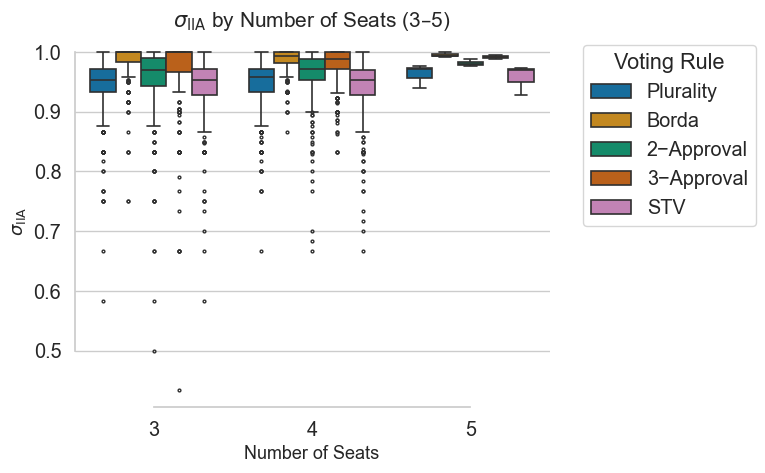

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for seats 3 to 5
df_subset = df[df["Num_seats"].isin([3, 4, 5])]

# 2. Define IIA columns
iia_cols = [
    'Sigma_IIA_Plurality',
    'Sigma_IIA_Borda',
    'Sigma_IIA_2-Approval',
    'Sigma_IIA_3-Approval',
    'Sigma_IIA_STV'
]

# 3. Melt into long format for Seaborn
df_melted = df_subset.melt(
    id_vars=["Num_seats"],
    value_vars=iia_cols,
    var_name="Voting Rule",
    value_name="σ_IIA"
)

# 4. Clean voting rule names
df_melted["Voting Rule"] = df_melted["Voting Rule"].str.replace("Sigma_IIA_", "").str.replace("-", "−")

# 5. Plot
sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(8, 5))

sns.boxplot(
    x="Num_seats",
    y="σ_IIA",
    hue="Voting Rule",
    data=df_melted,
    palette="colorblind",
    linewidth=1.2,
    fliersize=2
)

plt.title(r"$\sigma_{\mathrm{IIA}}$ by Number of Seats (3–5)", fontsize=15)
plt.xlabel("Number of Seats", fontsize=13)
plt.ylabel(r"$\sigma_{\mathrm{IIA}}$", fontsize=13)
plt.legend(title="Voting Rule", bbox_to_anchor=(1.05, 1), loc="upper left")
sns.despine(trim=True)
plt.tight_layout()
plt.savefig("sigma_iia_seats_plot.pdf", dpi=300)
plt.show()



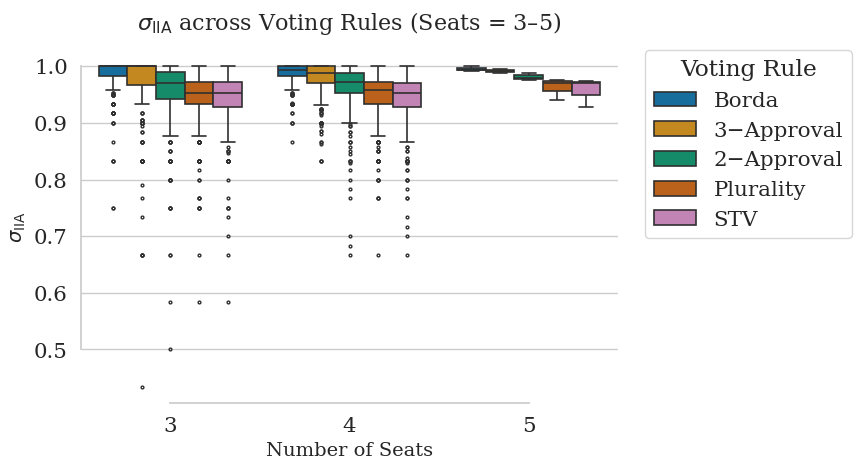

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter only rows where Num_seats is 3, 4, or 5
df_subset = df[df["Num_seats"].isin([3, 4, 5])]

# 2. Define and order voting rules
ordered_rules = ['Borda', '3−Approval', '2−Approval', 'Plurality', 'STV']
iia_col_map = {
    'Sigma_IIA_Borda': 'Borda',
    'Sigma_IIA_3-Approval': '3−Approval',
    'Sigma_IIA_2-Approval': '2−Approval',
    'Sigma_IIA_Plurality': 'Plurality',
    'Sigma_IIA_STV': 'STV'
}

# 3. Melt and rename columns
df_melted = df_subset[list(iia_col_map.keys()) + ['Num_seats']].melt(
    id_vars=["Num_seats"],
    var_name="Voting Rule Raw",
    value_name="σ_IIA"
)

df_melted["Voting Rule"] = df_melted["Voting Rule Raw"].map(iia_col_map)
df_melted["Voting Rule"] = pd.Categorical(df_melted["Voting Rule"], categories=ordered_rules, ordered=True)

# 4. MIT NeurIPS Aesthetic: clean, serif, colorblind, thin lines
sns.set(style="whitegrid", context="notebook", font="serif", font_scale=1.4)
plt.figure(figsize=(9, 5))

ax = sns.boxplot(
    x="Num_seats",
    y="σ_IIA",
    hue="Voting Rule",
    data=df_melted,
    palette="colorblind",
    linewidth=1.2,
    fliersize=2,
    dodge=True
)

# 5. Finishing Touches
ax.set_title(r"$\sigma_{\mathrm{IIA}}$ across Voting Rules (Seats = 3–5)", fontsize=16, pad=15)
ax.set_xlabel("Number of Seats", fontsize=14)
ax.set_ylabel(r"$\sigma_{\mathrm{IIA}}$", fontsize=14)
ax.legend(title="Voting Rule", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

sns.despine(trim=True)
plt.tight_layout()
plt.savefig("sigma_iia_best_boxplot_mit_neurips.pdf", dpi=400)
plt.show()


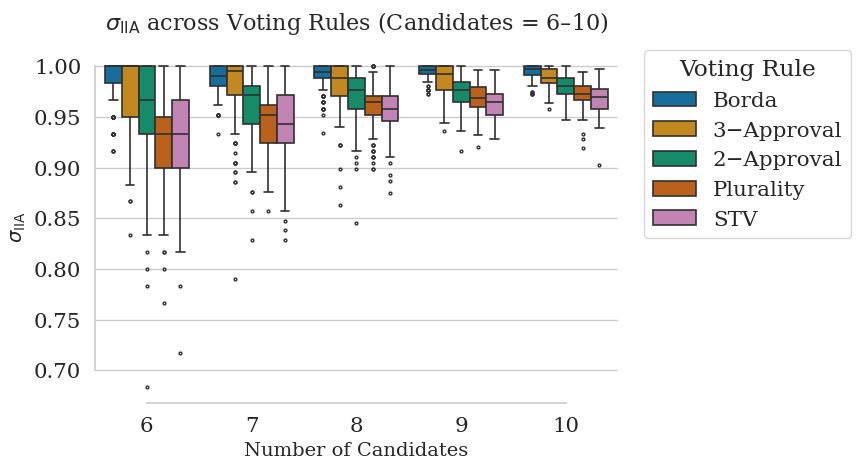

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for 6 ≤ Num_Candidates ≤ 10
df_subset = df[df["Num_Candidates"].isin([6, 7, 8, 9, 10])]

# 2. Voting rule column mapping
ordered_rules = ['Borda', '3−Approval', '2−Approval', 'Plurality', 'STV']
iia_col_map = {
    'Sigma_IIA_Borda': 'Borda',
    'Sigma_IIA_3-Approval': '3−Approval',
    'Sigma_IIA_2-Approval': '2−Approval',
    'Sigma_IIA_Plurality': 'Plurality',
    'Sigma_IIA_STV': 'STV'
}

# 3. Melt to long format
df_melted = df_subset[list(iia_col_map.keys()) + ['Num_Candidates']].melt(
    id_vars=["Num_Candidates"],
    var_name="Voting Rule Raw",
    value_name="σ_IIA"
)

df_melted["Voting Rule"] = df_melted["Voting Rule Raw"].map(iia_col_map)
df_melted["Voting Rule"] = pd.Categorical(df_melted["Voting Rule"], categories=ordered_rules, ordered=True)

# 4. Set MIT/NeurIPS boxplot style
sns.set(style="whitegrid", context="notebook", font="serif", font_scale=1.4)
plt.figure(figsize=(9, 5))

# 5. Plot
ax = sns.boxplot(
    x="Num_Candidates",
    y="σ_IIA",
    hue="Voting Rule",
    data=df_melted,
    palette="colorblind",
    linewidth=1.2,
    fliersize=2,
    dodge=True
)

# 6. Aesthetics
ax.set_title(r"$\sigma_{\mathrm{IIA}}$ across Voting Rules (Candidates = 6–10)", fontsize=16, pad=15)
ax.set_xlabel("Number of Candidates", fontsize=14)
ax.set_ylabel(r"$\sigma_{\mathrm{IIA}}$", fontsize=14)
ax.legend(title="Voting Rule", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

sns.despine(trim=True)
plt.tight_layout()
plt.savefig("sigma_iia_by_candidates_neurips.pdf", dpi=400)
plt.show()


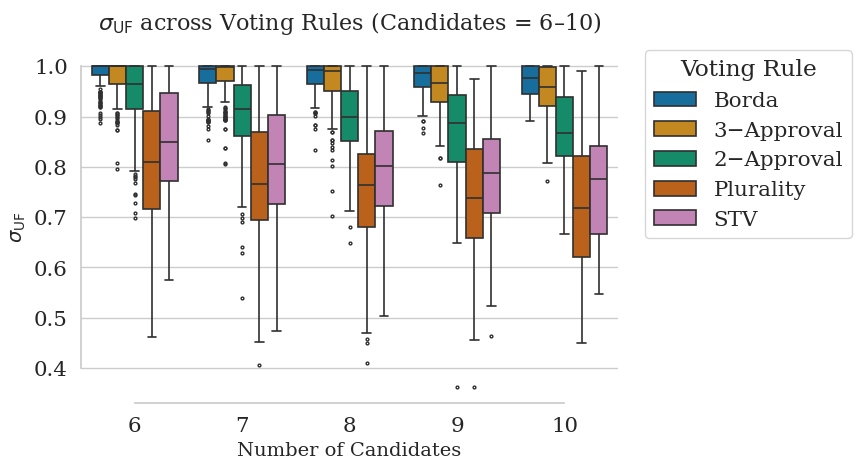

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for Num_Candidates in [6, 7, 8, 9, 10]
df_subset = df[df["Num_Candidates"].isin([6, 7, 8, 9, 10])]

# 2. Define and order voting rules
ordered_rules = ['Borda', '3−Approval', '2−Approval', 'Plurality', 'STV']
uf_col_map = {
    'Sigma_UF_Borda': 'Borda',
    'Sigma_UF_3-Approval': '3−Approval',
    'Sigma_UF_2-Approval': '2−Approval',
    'Sigma_UF_Plurality': 'Plurality',
    'Sigma_UF_STV': 'STV'
}

# 3. Melt to long format
df_melted = df_subset[list(uf_col_map.keys()) + ['Num_Candidates']].melt(
    id_vars=["Num_Candidates"],
    var_name="Voting Rule Raw",
    value_name="σ_UF"
)

df_melted["Voting Rule"] = df_melted["Voting Rule Raw"].map(uf_col_map)
df_melted["Voting Rule"] = pd.Categorical(df_melted["Voting Rule"], categories=ordered_rules, ordered=True)

# 4. NeurIPS/MIT-level plot aesthetics
sns.set(style="whitegrid", context="notebook", font="serif", font_scale=1.4)
plt.figure(figsize=(9, 5))

ax = sns.boxplot(
    x="Num_Candidates",
    y="σ_UF",
    hue="Voting Rule",
    data=df_melted,
    palette="colorblind",
    linewidth=1.2,
    fliersize=2,
    dodge=True
)

# 5. Title and labels
ax.set_title(r"$\sigma_{\mathrm{UF}}$ across Voting Rules (Candidates = 6–10)", fontsize=16, pad=15)
ax.set_xlabel("Number of Candidates", fontsize=14)
ax.set_ylabel(r"$\sigma_{\mathrm{UF}}$", fontsize=14)
ax.legend(title="Voting Rule", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

sns.despine(trim=True)
plt.tight_layout()
plt.savefig("sigma_uf_by_candidates_neurips.pdf", dpi=400)
plt.show()


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for Num_seats in [3, 4, 5]
df_subset = df[df["Num_seats"].isin([3, 4, 5])]

# 2. Define ordered voting rules and mapping
ordered_rules = ['Borda', '3−Approval', '2−Approval', 'Plurality', 'STV']
uf_col_map = {
    'Sigma_UF_Borda': 'Borda',
    'Sigma_UF_3-Approval': '3−Approval',
    'Sigma_UF_2-Approval': '2−Approval',
    'Sigma_UF_Plurality': 'Plurality',
    'Sigma_UF_STV': 'STV'
}

# 3. Melt into long format
df_melted = df_subset[list(uf_col_map.keys()) + ['Num_seats']].melt(
    id_vars=["Num_seats"],
    var_name="Voting Rule Raw",
    value_name="σ_UF"
)

df_melted["Voting Rule"] = df_melted["Voting Rule Raw"].map(uf_col_map)
df_melted["Voting Rule"] = pd.Categorical(df_melted["Voting Rule"], categories=ordered_rules, ordered=True)

# 4. Plot style (NeurIPS/MIT aesthetic)
sns.set(style="whitegrid", context="notebook", font="serif", font_scale=1.4)
plt.figure(figsize=(9, 5))

ax = sns.boxplot(
    x="Num_seats",
    y="σ_UF",
    hue="Voting Rule",
    data=df_melted,
    palette="colorblind",
    linewidth=1.2,
    fliersize=2,
    whis=[1,99],
    dodge=True
)

# 5. Titles and axis
ax.set_title(r"$\sigma_{\mathrm{UF}}$ across Voting Rules (Seats = 3–5)", fontsize=16, pad=15)
ax.set_xlabel("Number of Seats", fontsize=14)
ax.set_ylabel(r"$\sigma_{\mathrm{UF}}$", fontsize=14)
ax.legend(title="Voting Rule", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

sns.despine(trim=True)
plt.tight_layout()
plt.savefig("sigma_uf_by_seats_neurips.pdf", dpi=400)
plt.show()


NameError: name 'df' is not defined

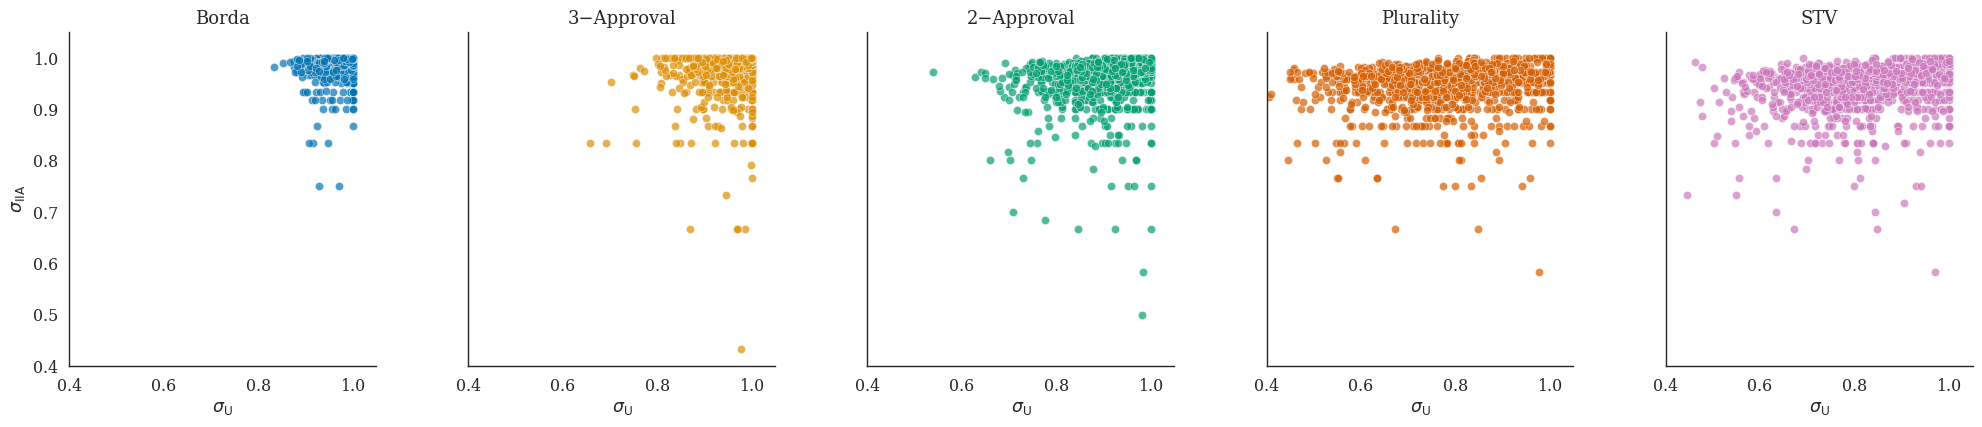

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/ss2776/Downloads/fairness_scottish_combined_results.csv")

# Voting rules and color map
voting_rules = ['Borda', '3−Approval', '2−Approval', 'Plurality', 'STV']
palette = sns.color_palette("colorblind", n_colors=len(voting_rules))
color_map = dict(zip(voting_rules, palette))

# Build combined DataFrame
rows = []
for rule in voting_rules:
    rule_df = pd.DataFrame({
        'Voting Rule': rule,
        'σ_IIA': df[f'Sigma_IIA_{rule.replace("−", "-")}'],
        'σ_UF': df[f'Sigma_UF_{rule.replace("−", "-")}']
    })
    rows.append(rule_df)
df_plot = pd.concat(rows, ignore_index=True)

# Set plot style
sns.set(style="white", context="paper", font="serif", font_scale=1.3)

# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Plot per voting rule
for ax, rule in zip(axes, voting_rules):
    sub_df = df_plot[df_plot["Voting Rule"] == rule]
    sns.scatterplot(
        data=sub_df,
        x="σ_UF",
        y="σ_IIA",
        color=color_map[rule],
        s=35,
        alpha=0.7,
        ax=ax,
        #label=rule,
        edgecolor='w',
        linewidth=0.4
    )
    ax.set_title(rule, fontsize=13)
    ax.set_xlim(0.4, 1.05)
    ax.set_ylim(0.4, 1.05)
    ax.set_xlabel(r"$\sigma_{\mathrm{U}}$")
    if ax == axes[0]:
        ax.set_ylabel(r"$\sigma_{\mathrm{IIA}}$")
    else:
        ax.set_ylabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Create horizontal legend *outside* the plot
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=color_map[rule],
                      label=rule, markersize=8) for rule in voting_rules]

# Use bbox_to_anchor to place legend below the entire figure


# Final layout adjustments
plt.tight_layout()
plt.subplots_adjust(bottom=0.25, wspace=0.3)
plt.savefig("/Users/ss2776/Downloads/iia_vs_uf_scatter_scottish_plot_1.pdf", dpi=400)
plt.show()


In [ ]:

from votekit.elections import STV

def Ranked_3_STV(profile):
    """
    Given a PreferenceProfile, returns the complete STV ranking as a list.
    Note thet this is a simulation of the STV method with 3 seats.
    
    Args:
        profile (PreferenceProfile): The preference profile with ballots and candidates.
    
    Returns:
        list: Candidates ranked from winner to last place according to Borda scores.
    """

    election = STV(profile, m= 3)
    
    # Get the full ranking (tuple of frozensets)
    borda_ranking = election.get_ranking(-1)
    
    # Flatten the frozensets into a list
    ranking_list = []
    for group in borda_ranking:
        ranking_list.extend(list(group))  # groups can have ties (more than one candidate)
    
    return ranking_list




import votekit.ballot_generator as bg
from votekit.pref_interval import PreferenceInterval
from fairness_metric import sigma_IIA, sigma_UF
from Voting_rules import Ranked_Borda, Ranked_Plurality, Ranked_2_Approval, Ranked_3_Approval
import pandas as pd
import numpy as np
from tqdm import tqdm

import numpy as np
import random


np.random.seed(2025)
random.seed(2025)


def simulate_BT_dirichlet_cases(num_profiles, num_ballots, alpha=3.0, candidate_range=(6, 11)):
    """
    Simulate BT profiles using Dirichlet-distributed preferences under:
      - Uniform case: Dirichlet(alpha)
      - Dominant case: Dirichlet(1/alpha)

    Args:
        num_profiles: number of profiles per candidate size per case
        num_ballots: number of ballots per profile
        alpha: Dirichlet concentration parameter
        candidate_range: tuple (start, end), number of candidates

    Returns:
        pandas DataFrame with metrics
    """
    records = []

    for num_cands in tqdm(range(candidate_range[0], candidate_range[1]), desc="Candidate sizes"):
        candidates = [chr(ord('A') + i) for i in range(num_cands)]

        for case in ["Uniform", "Dominant"]:
            alpha_param = alpha if case == "Uniform" else 1.0 / alpha
            pref_interval = PreferenceInterval.from_dirichlet(candidates=candidates, alpha=alpha_param)

            # Setup BT model
            slate_to_candidates = {"Alpha": candidates}
            pref_intervals_by_bloc = {"Alpha": {"Alpha": pref_interval}}
            bloc_voter_prop = {"Alpha": 1.0}
            cohesion_parameters = {"Alpha": {"Alpha": 1.0}}

            bt_model = bg.slate_BradleyTerry(
                pref_intervals_by_bloc=pref_intervals_by_bloc,
                bloc_voter_prop=bloc_voter_prop,
                slate_to_candidates=slate_to_candidates,
                cohesion_parameters=cohesion_parameters
            )

            for _ in tqdm(range(num_profiles), leave=False, desc=f"{case}, {num_cands} cands"):
                profile = bt_model.generate_profile(num_ballots)

                for rule_name, rule_func in [
                    ("Plurality", Ranked_Plurality),
                    ("Borda", Ranked_Borda),
                    ("2-Approval", Ranked_2_Approval),
                    ("3-Approval", Ranked_3_Approval),
                    ("STV", Ranked_3_STV)
                ]:
                    records.append({
                        "Num_Candidates": num_cands,
                        "Case": case,
                        "Voting_Rule": rule_name,
                        "Sigma_IIA": sigma_IIA(profile, rule_func),
                        "Sigma_UF": float(eval(str(sigma_UF(profile, rule_func)))),
                    })

    return pd.DataFrame(records)



df_sim_2 = simulate_BT_dirichlet_cases(1000, 1000, alpha=2.0, candidate_range=(6, 10))

Uniform, 6 cands:   0%|          | 0/1000 [00:00<?, ?it/s]

In [27]:
df_sim_2.to_csv('/Users/ss2776/Downloads/synthetic_data_neurips_2_man.csv', index=False)